In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [5]:
from tensorflow.keras.utils import to_categorical   # 분류분석시 원핫인코딩(추천)
import pandas as pd   # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model  # 모델생성, 모델load
from tensorflow.keras.layers import Dense,Input
import numpy as np


# 딥러닝 : 데이터의 규칙성을 추출
- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립 = 입력변수,타겟 = 종속변수)
        *분류분석(타겟변수가  category 변수인 분석. 다중분류 vs 이진분류)  vs 회귀분석
    * 비지도학습(입력변수)
        *군집화
    * 강화학습
- 지도 학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성 
    - 2. 데이터 전처리 : 스케일 조정, 
              - 훈련데이터셋(학습데이터셋), 검증데이터셋, 
              - 시험데이터셋, 원핫인코딩(One-Hot Encoding)
              **원-핫 인코딩(One-Hot Encoding)**은 머신러닝이나 딥러닝 모델이 **범주형 데이터(예: 색상, 도시 이름 등)**를 이해할 수 있도록 숫자형 데이터,
              특히 이진 벡터로 변환하는 데이터 전처리 기법입니다
    - 3. 모델구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(학습,검증데이터셋)
    - 6. 모델 평가(시험데이터셋)
    - 7. 모델 저장/사용(입력값 주면 예측값 받기)

# 1. 데이터셋 생성

# 2. 데이터 전처리

In [11]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]*10)
y_train = np.array([2, 4, 6, 8, 10,12,14,16,18]*10)

# 검증데이터
x_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y_val = np.array([2, 4, 6, 8, 10,12,14,16,18])

In [18]:
# 인코딩 종류(
    # 라벨인코딩 = 문자를 숫자로
    # 원핫인코딩 = 값의 갯수만큼 열을 만들고, 해당범주에 해당하는 열에만 1을, 나머지는 0을)
data = np.array(['a','b','c','b','b'])
print('원데이터 : ',data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 : ', labeling_data)
# one_hot_encoding_data = to_categorical(labeling_data) : to_categorical 함수에 문자열을 넣으면 에러남
print('원핫인코딩된 데이터 : \n',one_hot_encoding_data)

원데이터 :  ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 :  [0 1 2 1 1]
원핫인코딩된 데이터 : 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [22]:
# 원핫인코딩(분류분석을 위한 target변수)
data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data)           # 원핫인코딩 결과가 numpy배열
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data)            # 원핫인코딩 결과가 DataFrame
print('get_dummies 이용 \n',getdummies_onehot)
print(type(categorical_onehot),type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용 
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [26]:
# 분류분석을 위한 target 변수 원핫인코딩
Y_train = to_categorical(y_train,19)
Y_val   = to_categorical(y_val)

In [27]:
x_train.shape,Y_train.shape,x_val.shape,Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델 구성

In [28]:
model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(38,activation='sigmoid'))  #활성화 함수 :relu, elu tanh(이미지처리),sigmoid
model.add(Dense(64,activation='elu'))
model.add(Dense(units=32,activation='elu')) # Dense(units=32,activation='elu')  = Dense(2,activation='elu')
model.add(Dense(19,activation='softmax'))   # 분류분석의 출력은 꼭 activation='softmax'를 써서 합이 1이되게 한다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중 분류분석에서의 loss : categorical_crossentropy

In [29]:
model.compile(loss = "categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

# 5. 모델 학습시키기

In [31]:
hist = model.fit(x_train,Y_train,epochs=300,batch_size=10,
                validation_data=(x_val,Y_val),verbose=2)
# verbose = 0: 출력 없음 / 1: 기본값 출력 / 2: epoch별 자세한 로그 출력

Epoch 1/300
9/9 - 0s - loss: 0.1695 - accuracy: 0.9778 - val_loss: 0.1557 - val_accuracy: 1.0000 - 201ms/epoch - 22ms/step
Epoch 2/300
9/9 - 0s - loss: 0.1867 - accuracy: 1.0000 - val_loss: 0.1346 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 0.1340 - accuracy: 1.0000 - val_loss: 0.1271 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 0.1152 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 0.1118 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 6/300
9/9 - 0s - loss: 0.1183 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 0.1174 - accuracy: 1.0000 - val_loss: 0.0907 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 0.0833 - accuracy: 1.0000 - val_loss: 0.0819 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 9/300
9/9 - 0s - loss: 0

Epoch 69/300
9/9 - 0s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 211/300
9/

9/9 - 0s - loss: 5.9095e-04 - accuracy: 1.0000 - val_loss: 5.8235e-04 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 267/300
9/9 - 0s - loss: 5.8407e-04 - accuracy: 1.0000 - val_loss: 5.7780e-04 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 268/300
9/9 - 0s - loss: 5.7619e-04 - accuracy: 1.0000 - val_loss: 5.7250e-04 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 269/300
9/9 - 0s - loss: 5.7446e-04 - accuracy: 1.0000 - val_loss: 5.6685e-04 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 270/300
9/9 - 0s - loss: 5.6651e-04 - accuracy: 1.0000 - val_loss: 5.6196e-04 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 5.6292e-04 - accuracy: 1.0000 - val_loss: 5.5669e-04 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 5.5835e-04 - accuracy: 1.0000 - val_loss: 5.5167e-04 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 5.5121e-04 - accuracy: 1.0000 - val_loss: 5.4685e-04 - val_accurac

# 6.모델 평가하기(모델 학습과정 살펴보고 evaluate)

In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

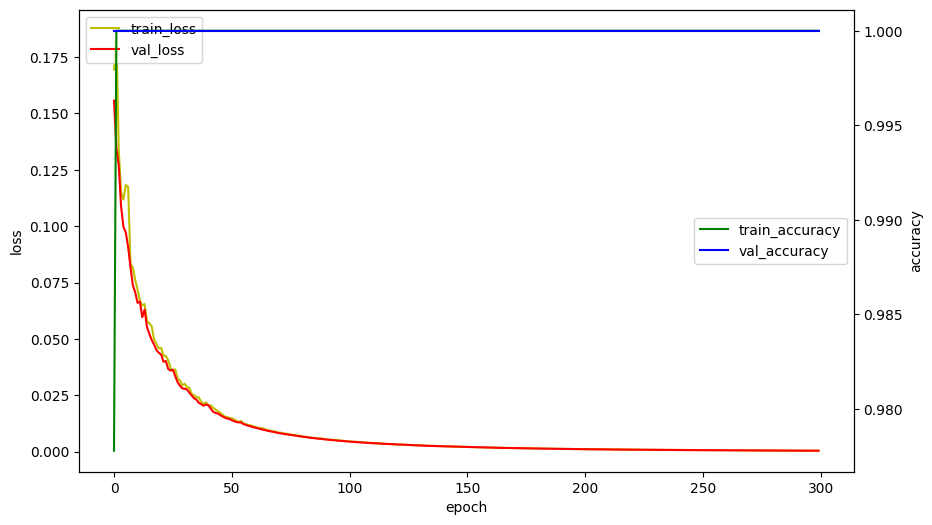

In [40]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [44]:
# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)
score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss : ',score[0])
print('accuracy :', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 4.3320e-04 - accuracy: 1.0000
loss :  0.000433195848017931
accuracy : 1.0


# 7. 모델 사용하기 (모델을 이용해서 예측하기)

In [46]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 16ms/step


4

In [47]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 18ms/step


4

In [50]:
# 몇%의 확률로 4라고 예측했니?
H[0,H.argmax()]*100

99.96752738952637

In [52]:
# 2,4,6의 확률
H[0,[2,4,6]]*100

array([1.8085731e-02, 9.9967529e+01, 1.4387553e-02], dtype=float32)

# 7. 모델저장 

In [53]:
model.save('model/02_deep.h5')

In [54]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')


In [55]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 46ms/step


6